In [ ]:
!pip install streamlit

In [ ]:
!pip install -U pylint autopep8

2022-05-19 12:22:12.781 INFO    root: SUCCESS: There are 289 rows in your dataframe


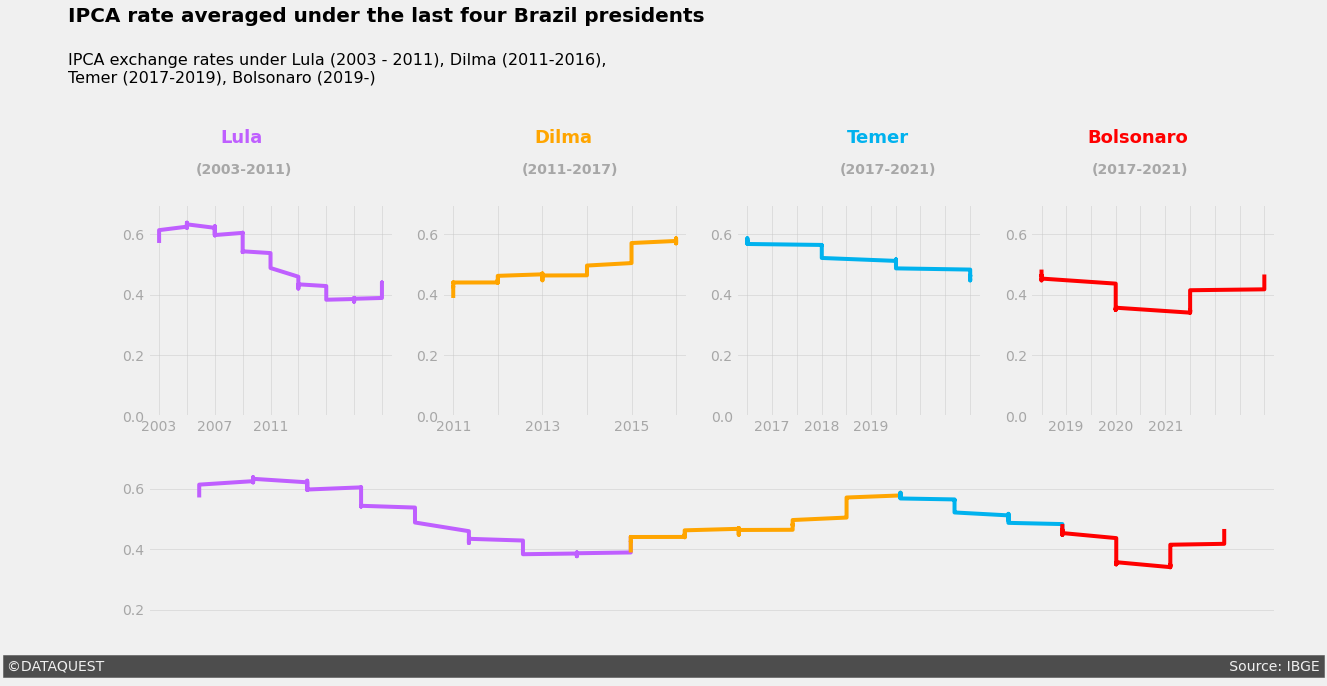

2022-05-19 12:22:13.263 ERROR   root: ERROR: we were not able to find /ipca.csv
2022-05-19 12:22:13.264 ERROR   root: ERROR: we were not able to find wrong_string
2022-05-19 12:22:13.265 ERROR   root: ERROR: Error type


<Figure size 432x288 with 0 Axes>

In [4]:
#%%file test_log.py
"""
Author: Thyall
Data: May 2022
IPCA Storytelling
"""
import logging
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import streamlit as st
from PIL import Image

logging.basicConfig(
    filename='./results.log',
    level=logging.INFO,
    filemode='w',
    format='%(name)s - %(levelname)s - %(message)s')

def read_data(file_path):
    '''
    Args:
        file_path: (string) path from the file

    Returns:
            Dataframe
    '''
    try:
        assert isinstance(file_path, str)
        df_func = pd.read_csv(file_path, sep=";")
        shape=df_func.shape[0]
        logging.info(f"SUCCESS: There are {shape} rows in your dataframe")
        return df_func

    except FileNotFoundError:
        logging.error(f"ERROR: we were not able to find {file_path}")
        return None

    except AssertionError:
        logging.error("ERROR: Error type")
        return None

df_ipca = read_data('/content/ipca.csv')

df_ipca.rename(columns={'IPCA dessazonalizado - Variação mensal (%)': 'IPCA',},
                      inplace=True)

df_ipca['IPCA'] = df_ipca['IPCA'].str.replace(',', '.')
df_ipca['IPCA'] = df_ipca['IPCA'].astype(float)

df_ipca['rolling_mean'] = df_ipca['IPCA'].rolling(60).mean()

df_ipca['date'] = df_ipca['Mês'].str.split(' ').str[1]

df_ipca['date'] = pd.to_datetime(df_ipca['date'], format='%Y')

df_ipca_lula = df_ipca.copy()[(df_ipca['date'].dt.year <= 2011)]

df_ipca_dilma = df_ipca.copy()[(df_ipca['date'].dt.year >= 2011) & (df_ipca['date'].dt.year <= 2016)]

df_ipca_temer = df_ipca.copy()[(df_ipca['date'].dt.year >= 2016) & (df_ipca['date'].dt.year <= 2019)]

df_ipca_bolsonaro = df_ipca.copy()[(df_ipca['date'].dt.year >= 2019)]

### Adding the FiveThirtyEight style
style.use('fivethirtyeight')

### Adding the subplots
fig = plt.figure(figsize=(18, 8))
ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)
ax5 = plt.subplot(2,1,2)

axes = [ax1, ax2, ax3, ax4, ax5]

### Changes to all the subplots
for ax in axes:
    ax.set_ylim(0.0, 0.7)
    ax.set_yticks([0.0, 0.2, 0.4, 0.6])
    ax.set_yticklabels(['0.0', '0.2','0.4', '0.6'],
                   alpha=0.3)
    ax.grid(alpha=0.5)

### Ax1: Lula
ax1.plot(df_ipca_lula['date'], df_ipca_lula['rolling_mean'],
        color='#BF5FFF')
ax1.set_xticklabels(['', '2003', '',
                     '2007', '', '2011', ''],
                   alpha=0.3)
ax1.text(732016.0, 0.9, 'Lula', fontsize=18, weight='bold',
        color='#BF5FFF')
ax1.text(731700.0, 0.8, '(2003-2011)', weight='bold',
        alpha=0.3)

### Ax2: Dilma
ax2.plot(df_ipca_dilma['date'], df_ipca_dilma['rolling_mean'],
        color='#ffa500')
ax2.set_xticklabels(['', '2011', '', '2013', '',
                     '2015', '', '2016'],
                   alpha=0.3)
ax2.text(734799.0, 0.9, 'Dilma', fontsize=18, weight='bold',
        color='#ffa500')
ax2.text(734698.0, 0.8, '(2011-2017)', weight='bold',
         alpha=0.3)

### Ax3: Temer
ax3.plot(df_ipca_temer['date'], df_ipca_temer['rolling_mean'],
        color='#00B2EE')
ax3.set_xticklabels(['', '2017', '', '2018', '', '2019', '',],
                   alpha=0.3)
ax3.text(736455.0, 0.9, 'Temer', fontsize=18, weight='bold',
        color='#00B2EE')
ax3.text(736420.0, 0.8, '(2017-2021)', weight='bold',
         alpha=0.3)

### Ax4: Bolsonaro
ax4.plot(df_ipca_bolsonaro['date'], df_ipca_bolsonaro['rolling_mean'],
        color='#FF0000')
ax4.set_xticklabels([ '','2019', '', '2020', '', '2021', ''],
                   alpha=0.3)
ax4.text(737285.0, 0.9, 'Bolsonaro', fontsize=18, weight='bold',
        color='#FF0000')
ax4.text(737305.0, 0.8, '(2017-2021)', weight='bold',
         alpha=0.3)

### Ax4: 
ax5.plot(df_ipca_lula['date'], df_ipca_lula['rolling_mean'],
        color='#BF5FFF')
ax5.plot(df_ipca_dilma['date'], df_ipca_dilma['rolling_mean'],
        color='#ffa500')
ax5.plot(df_ipca_temer['date'], df_ipca_temer['rolling_mean'],
        color='#00B2EE')
ax5.plot(df_ipca_bolsonaro['date'], df_ipca_bolsonaro['rolling_mean'],
        color='#FF0000')
ax5.grid(alpha=0.5)
ax5.set_xticks([])


### Adding a title and a subtitle
ax1.text(730016.0, 1.3,
         'IPCA rate averaged under the last four Brazil presidents',
         fontsize=20, weight='bold')
ax1.text(730016.0, 1.1,
         '''IPCA exchange rates under Lula (2003 - 2011), Dilma (2011-2016),
Temer (2017-2019), Bolsonaro (2019-)''',
        fontsize=16)

### Adding a signature
ax5.text(729916.0, 0, '©DATAQUEST' + ' '*250 + 'Source: IBGE',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)
        
plt.show()
plt.savefig('image.png')

#image = Image.open('image.png')
#st.image(image)

if __name__ == "__main__":
    read_data('/ipca.csv')
    read_data('wrong_string')
    read_data(5)

In [ ]:
!autopep8 --in-place --aggressive --aggressive test_log.py

In [ ]:
!pylint test_log.py

************* Module test_log
test_log.py:137:0: C0301: Line too long (107/100) (line-too-long)
test_log.py:8:0: E0401: Unable to import 'streamlit' (import-error)
test_log.py:32:8: W1203: Use lazy % formatting in logging functions (logging-fstring-interpolation)
test_log.py:36:8: W1203: Use lazy % formatting in logging functions (logging-fstring-interpolation)
test_log.py:138:-1: W0105: String statement has no effect (pointless-string-statement)

------------------------------------------------------------------
Your code has been rated at 8.57/10 (previous run: 8.41/10, +0.16)



In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('ipca.csv')
df.head()

,"Mês;""IPCA dessazonalizado - Variação mensal (%)"""
"Brasil;""janeiro 1998"";""0","59"""
"Brasil;""fevereiro 1998"";""0","44"""
"Brasil;""março 1998"";""0","28"""
"Brasil;""abril 1998"";""0","17"""
"Brasil;""maio 1998"";""0","48"""
